In [17]:
# Dependencies and Setup
# Water consumption
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path


In [18]:
# File to Load (Remember to Change These)
path = Path("Resources/austin_water.csv")
customer_data_df = pd.read_csv(path)
customer_data_df.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,201201,78613,Irrigation - Multi-Family,11000
1,201201,78613,Multi-Family,23000
2,201201,78617,Residential,19840800
3,201201,78617,Multi-Family,2477000
4,201201,78652,Irrigation - Residential,38500


In [19]:
# Filter the data to only include the data for years 2013-2017

customer_data_df['Year Month'] = pd.to_datetime(customer_data_df['Year Month'], format='%Y%m')

filtered_data = customer_data_df[(customer_data_df['Year Month'].dt.year >= 2013) & (customer_data_df['Year Month'].dt.year <= 2017)]

filtered_data


,Year Month,Postal Code,Customer Class,Total Gallons
1850,2013-01-01,78613,Irrigation - Multi-Family,15000
1851,2013-01-01,78613,Multi-Family,20000
1852,2013-01-01,78617,Irrigation - Residential,200
1853,2013-01-01,78617,Residential,21866800
1854,2013-01-01,78617,Multi-Family,2920900
...,...,...,...,...
11397,2017-12-01,78758,Irrigation - Residential,40000
11398,2017-12-01,78759,Irrigation - Multi-Family,996500
11399,2017-12-01,78759,Multi-Family,34477800
11400,2017-12-01,78759,Irrigation - Residential,51500


In [20]:
# Grouping by Customer Class and Time
cust_class_totals = filtered_data.groupby(['Customer Class'])['Total Gallons'].sum()

time_totals = filtered_data.groupby(['Year Month'])['Total Gallons'].sum()

#time_totals
cust_class_totals

Customer Class
Irrigation - Multi-Family     3871926600
Irrigation - Residential       197562900
Multi-Family                 41908434000
Residential                  71727421200
Name: Total Gallons, dtype: int64

In [21]:
# Sorting for time
time_sort = time_totals.sort_values(ascending=False)

time_sort

Year Month
2015-08-01    2763112500
2015-09-01    2684620600
2013-09-01    2593170700
2014-09-01    2564459200
2017-08-01    2547847000
2013-08-01    2534850100
2013-07-01    2491107800
2016-08-01    2470237400
2017-07-01    2466226200
2016-07-01    2415686400
2015-10-01    2401311400
2014-08-01    2358940000
2017-09-01    2353679000
2016-09-01    2156562700
2014-07-01    2134472900
2016-10-01    2107208900
2013-06-01    2104754100
2017-06-01    2098386200
2015-07-01    2033398200
2013-05-01    2019089400
2017-10-01    2018448000
2013-10-01    2017698100
2014-06-01    2005111400
2014-05-01    1985723400
2017-05-01    1979500400
2016-11-01    1947654300
2014-11-01    1945344400
2013-01-01    1907330000
2014-10-01    1904262000
2013-04-01    1875674700
2017-11-01    1867682000
2016-06-01    1856758200
2015-11-01    1849563900
2014-04-01    1779458600
2015-01-01    1776078100
2016-04-01    1770805400
2014-01-01    1761888000
2016-12-01    1761018500
2017-01-01    1754559800
2013-03-01    

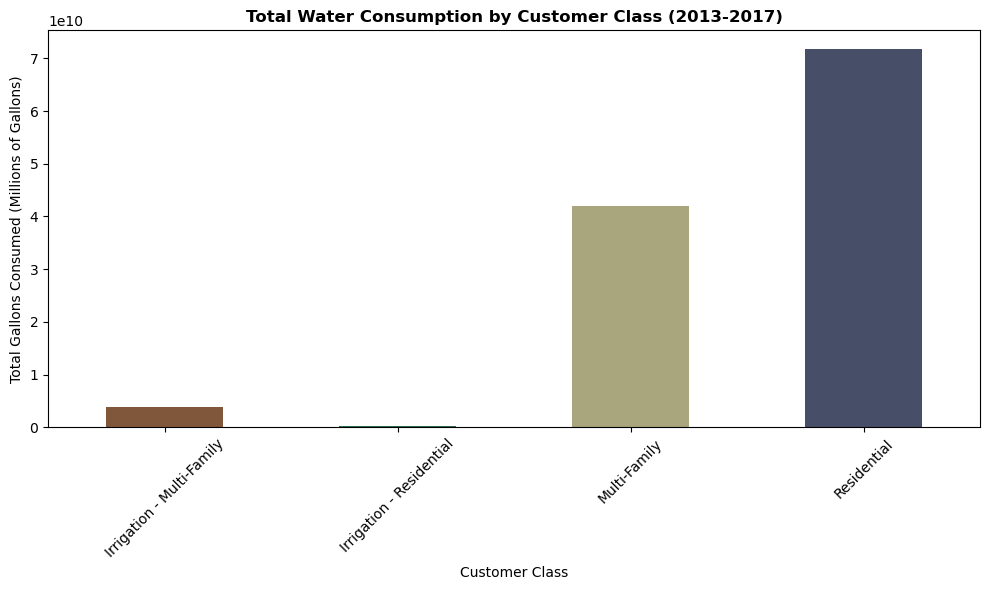

In [22]:
# Creating bar graph for Customer Class totals

plt.figure(figsize=(10, 6))
cust_class_totals.plot(kind='bar', color=["#81573B", "#2E6D4F", "#A9A57C", "#464E68"])
plt.xlabel('Customer Class')
plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
plt.title('Total Water Consumption by Customer Class (2013-2017)', weight="bold")

# Formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Create line plot 
#filtered_data['Total Gallons'].plot(kind='line',figsize=(10, 5))
#plt.xlabel('Year')
#plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
#plt.title('Top 10 Year Month with Highest Water Consumption (2013-2017)')



In [24]:
#Filtering for Multi-Family Class

m_fam_data = filtered_data[(filtered_data['Customer Class'] == 'Multi-Family')]

m_fam_totals = m_fam_data.groupby(['Customer Class', 'Year Month'])['Total Gallons'].sum()

m_fam_totals.dtypes

dtype('int64')

In [25]:
#Filtering for Residential Customer Class

residential_data = filtered_data[(filtered_data['Customer Class'] == 'Residential')]

residential_totals = residential_data.groupby(['Customer Class', 'Year Month'])['Total Gallons'].sum()

residential_totals.dtypes

dtype('int64')

In [26]:
# Filtering for any zip code including Irrigation 

irrigation_data = filtered_data[(filtered_data['Customer Class'].str.contains("Irrigation"))]

irrigation_totals = irrigation_data.groupby(['Customer Class', 'Year Month'])['Total Gallons'].sum()

irrigation_data.dtypes

Year Month        datetime64[ns]
Postal Code                int64
Customer Class            object
Total Gallons              int64
dtype: object

KeyError: 'Year Month'

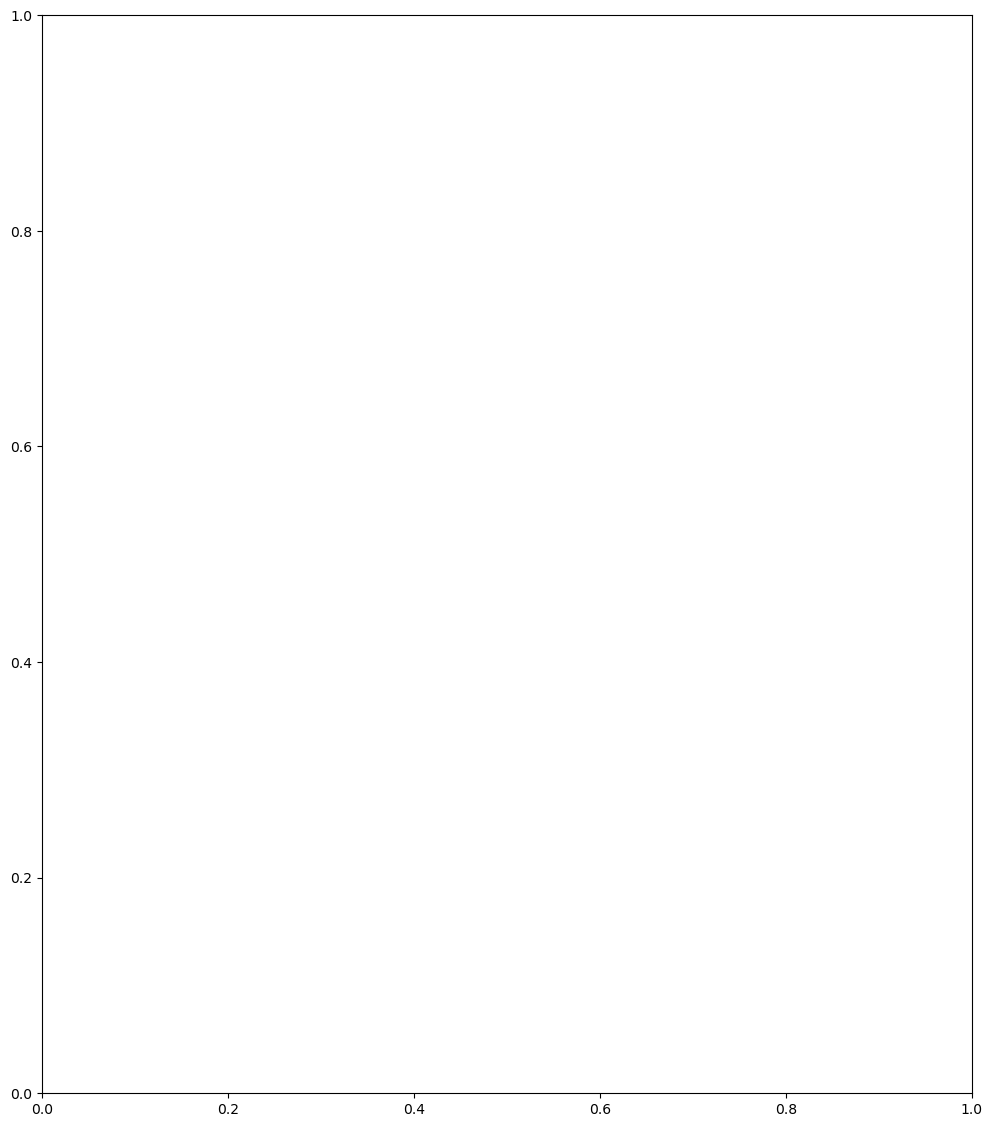

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# Plot the lines for Multi-Family
ax.plot(m_fam_totals['Year Month'], m_fam_totals['Total Gallons'], label='Multi-Family')
# Plot the lines for Residential
ax.plot(residential_totals['Year Month'], residential_totals['Total Gallons'], label='Residential')  
# Plot the line for Irrigation
ax.plot(irrigation_totals['Year Month'], irrigation_totals['Total Gallons'], label='Irrigation') 


